In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

Here I would like to explore what is the ranks each form of governement secures on an average. We also have box plot to see the ranks for the year 2016 and 2019 to monitor any changes.

In [ ]:
govt=pd.read_csv('/content/government.csv')
d1=pd.read_csv('/content/2016.csv')
d1.head()
govt.head()

,Country,Government_type
0,Afghanistan,presidential Islamic republic
1,Albania,parliamentary republic
2,Algeria,presidential republic
3,American Samoa,republican form of government with separate ex...
4,Andorra,parliamentary democracy (since March 1993) tha...


In [ ]:
govt.rename(columns = {'Country':'c'}, inplace = True) 
d1.rename(columns = {'Country':'c'}, inplace = True) 
d1.head()

,c,Region,rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [ ]:
new_frame=pd.merge(govt,d1,how='inner',on='c')
new_frame.head()

,c,Government_type,Region,rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Afghanistan,presidential Islamic republic,Southern Asia,154,3.360,3.288,3.432,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558
1,Albania,parliamentary republic,Central and Eastern Europe,109,4.655,4.546,4.764,0.95530,0.50163,0.73007,0.31866,0.05301,0.16840,1.92816
2,Algeria,presidential republic,Middle East and Northern Africa,38,6.355,6.227,6.483,1.05266,0.83309,0.61804,0.21006,0.16157,0.07044,3.40904
3,Angola,presidential republic,Sub-Saharan Africa,141,3.866,3.753,3.979,0.84731,0.66366,0.04991,0.00589,0.08434,0.12071,2.09459
4,Argentina,presidential republic,Latin America and Caribbean,26,6.650,6.560,6.740,1.15137,1.06612,0.69711,0.42284,0.07296,0.10989,3.12985


In [ ]:
def preprocess(text):
  head, sep, tail = text.partition(';')
  return head

In [ ]:
new_frame['Government_type']=new_frame['Government_type'].apply(preprocess)

In [ ]:
new_dataset = new_frame[['c','Government_type','rank']]

In [ ]:
d2=pd.read_csv('/content/2017.csv')
d2.rename(columns = {'Country':'c','rank':'rank17'}, inplace = True) 
new_d2 = d2[['c','rank17']]
d3=pd.read_csv('/content/2018.csv')
d3.rename(columns = {'Country':'c','rank':'rank18'}, inplace = True) 
new_d3 = d3[['c','rank18']]
d4=pd.read_csv('/content/2019.csv')
d4.rename(columns = {'Country':'c','rank':'rank19'}, inplace = True) 
new_d4 = d4[['c','rank19']]


In [ ]:
new_dataset=pd.merge(new_dataset,new_d2,how='inner',on='c')
new_dataset=pd.merge(new_dataset,new_d3,how='inner',on='c')
new_dataset=pd.merge(new_dataset,new_d4,how='inner',on='c')
new_dataset.head()


,c,Government_type,rank,rank17,rank18,rank19
0,Afghanistan,presidential Islamic republic,154,141,145,154
1,Albania,parliamentary republic,109,109,112,107
2,Algeria,presidential republic,38,53,84,88
3,Argentina,presidential republic,26,24,29,47
4,Armenia,parliamentary democracy,121,121,129,116


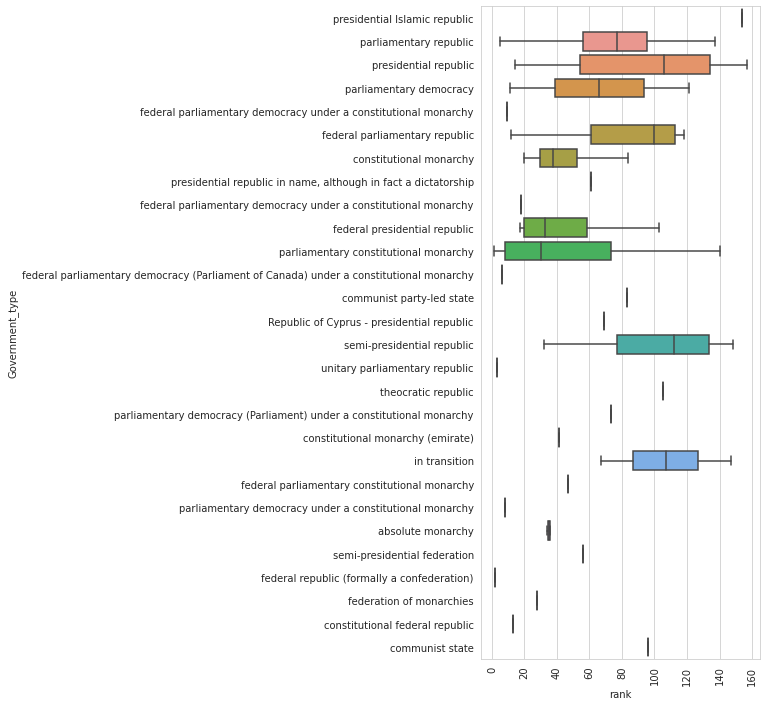

In [ ]:
plt.figure(figsize=(5,12))
plt.xticks(rotation=90)
sns.boxplot(y='Government_type',x='rank',data=new_dataset)


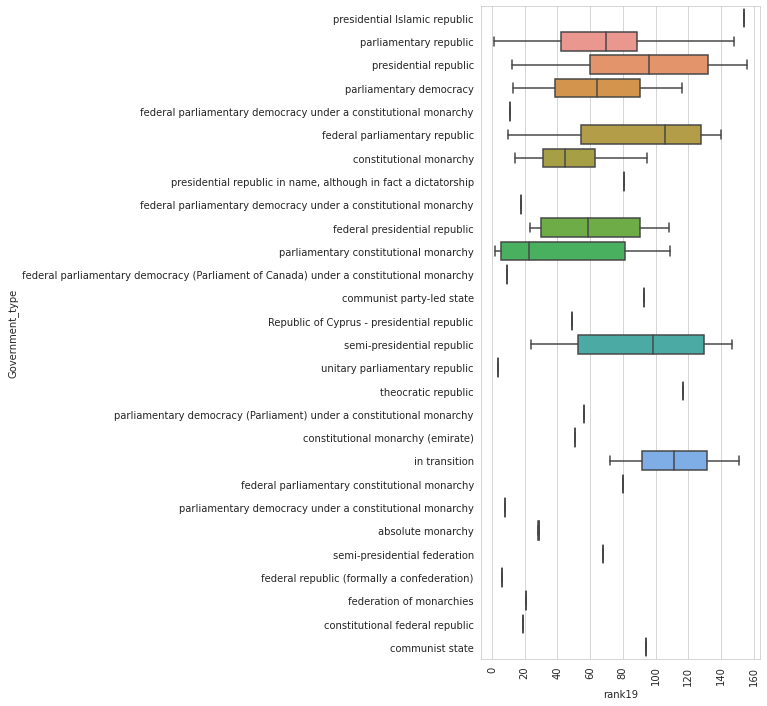

In [ ]:
plt.figure(figsize=(5,12))

 * From this above boxplot we can see that the countries that allow freedom are ranked at the top as supposed to countries that have stricter regime.   However, absolute monarchies,federation of monarchies,constituitional monarchy(emirate),unitary parliament republic have lower ranks.

* Though countries like Saudi and Qatar though with absolute monarchy have scored better ranks due to their social welfare systems 

* These representation can be attributed to a particular regime's leader and their policies. 

# Conclusion

* From this we can conclude that the form of government does affect the ranks but ultimately it also depends on the leader of the country and their policies.